In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)

In [ ]:
df = df.reset_index().drop(['Date', 'Adj Close'], axis=1)
df.head()

In [ ]:
ma100 = df.Close.rolling(100).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
#Split data into training, testing

idx = int(len(df) * 0.7) #Marks 70% point in dataframe
training = pd.DataFrame(df['Close'][0:idx])
testing = pd.DataFrame(df['Close'][idx:])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler(feature_range=(0, 1))

training_arr = s.fit_transform(training)

x_train, y_train = [], []

for i in range(100, training_arr.shape[0]): #100 Days
    x_train.append(training_arr[i-100 : i]) #Makes days zero indexed
    y_train.append(training_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
past100_days = training.tail(100)
finaldf = past100_days.append(testing, ignore_index=True)

inpdata = s.fit_transform(finaldf)

In [ ]:
x_test, y_test = [], []

idx = inpdata.shape[0]
for i in range(100, idx):
    x_test.append(inpdata[i-100:i])
    y_test.append(inpdata[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [15]:
#Making Predictions

y_pred = model.predict(x_test)

s_factor = 1/s.scale_
y_pred *= s_factor
y_test *= s_factor

24/24 [==============================] - 1s 38ms/step


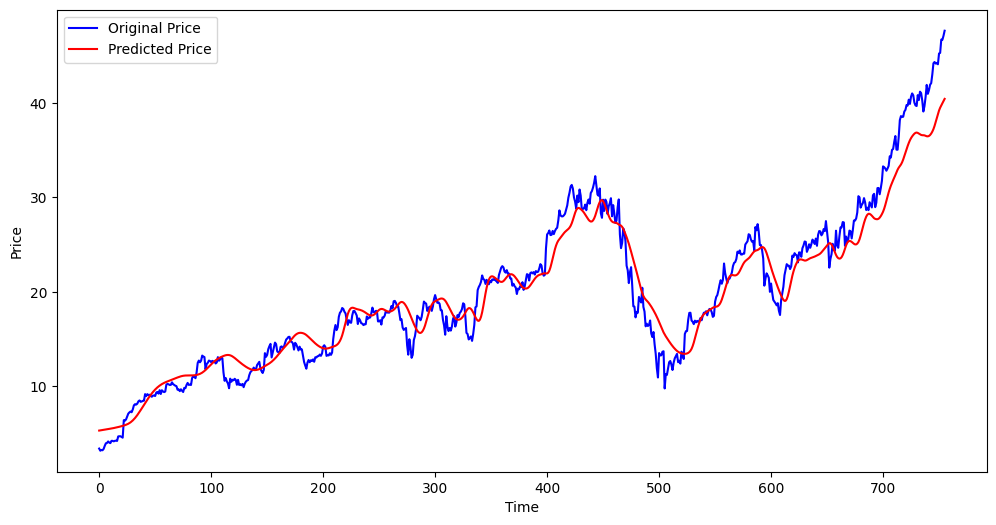

In [19]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
import pandas_datareader as data

start = "2010-01-01"
end = "2019-12-31"

df = data.DataReader("AAPL", "yahoo", start, end)
des = df.describe()
des.drop(["25%", "50%", "75%"], axis=0, inplace=True)
des.describe()

None
